Задачи 1 и 2
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.


In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

In [5]:
from itertools import product

In [17]:
n=5
p=1/4
pb = binom(n = 5, p = 0.25)

In [18]:
x = np.arange(1,6)
pmf = pb.pmf(x)

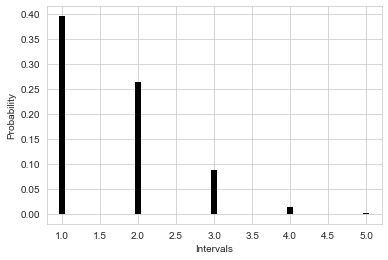

In [35]:
sb.set_style('whitegrid')
plt.vlines(x ,0, pb.pmf(x), colors='k', linestyles='-', lw=6)
plt.ylabel('Probability')
plt.xlabel('Intervals')
plt.show()

In [22]:
x_values = np.arange(0, 6)

print(x_values)

[0 1 2 3 4 5]


In [32]:
x_probabilities = np.array([ 1, 2, 3, 4, 5]) / 64

print(x_probabilities)

[0.015625 0.03125  0.046875 0.0625   0.078125]


In [26]:
m = (x_values * x_probabilities).sum()
print(m)

13.75


Задача 3
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [1]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [2]:
lambda_ = 10

In [7]:
poisson_proba(k=10, lambda_=lambda_)

0.1251100357211333

In [15]:
1 - sum(poisson_proba(k=i, lambda_=lambda_) for i in range(16))

0.04874040330397855

Задача 4
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.